inventory and operational leakage

import lib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


load cleaned dataset

In [3]:
df = pd.read_csv("profit_leakage_cleaned.csv")
df.head()


,order_id,order_date,customer_id,customer_type,region,sales_channel,product_id,product_category,unit_cost,unit_price,...,refund_amount,inventory_level,reorder_level,holding_cost,payment_delay_days,outstanding_amount,supplier_delay_days,logistics_cost,operational_cost,profit_margin_percent
0,1,2022-01-01 00:00:00,16795,Retail,North,Distributor,435,Automobile,4829.88,888.93,...,0.0,483,189,33.15,18,0.000000,24,659.09,78.99,-455.20
1,2,2022-01-01 00:01:00,1860,Corporate,North,Distributor,235,Pharma,3173.46,4089.16,...,0.0,11,182,208.42,10,0.000000,29,871.93,278.40,-0.05
2,3,2022-01-01 00:02:00,39158,Wholesale,East,Online,729,Electronics,3498.54,3923.52,...,0.0,260,183,346.40,69,71721.553248,11,946.05,1743.35,7.04
3,4,2022-01-01 00:03:00,45732,Retail,South,Distributor,1939,Furniture,628.06,851.16,...,0.0,202,53,43.85,41,4085.993580,17,833.95,716.21,22.22
4,5,2022-01-01 00:04:00,12284,Retail,North,Online,1670,Pharma,1257.04,3229.26,...,0.0,152,185,19.90,21,0.000000,25,540.11,1732.09,32.47


inventory overview

In [6]:
df['stockout_flag'] = (df['inventory_level'] <= df['reorder_level']).astype(int)

df['stockout_flag'].value_counts()


stockout_flag
0    74763
1    25237
Name: count, dtype: int64

In [7]:
df[['quantity_sold', 'stockout_flag']].head()


,quantity_sold,stockout_flag
0,17,0
1,6,1
2,19,0
3,5,0
4,6,1


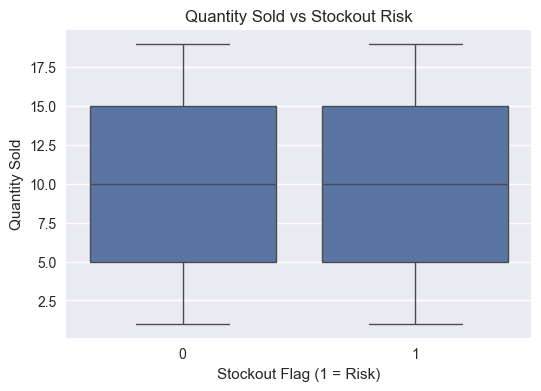

In [8]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=df,
    x='stockout_flag',
    y='quantity_sold'
)
plt.title("Quantity Sold vs Stockout Risk")
plt.xlabel("Stockout Flag (1 = Risk)")
plt.ylabel("Quantity Sold")
plt.show()


inventory level vs reorder level

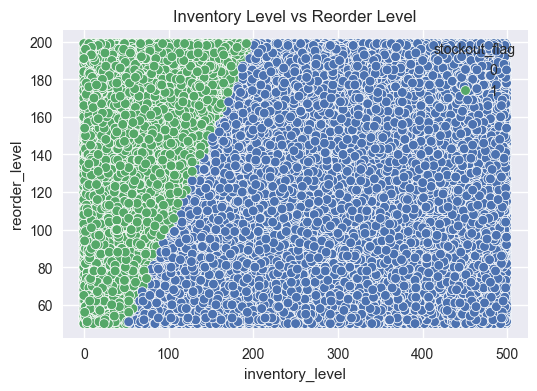

In [9]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df,
    x='inventory_level',
    y='reorder_level',
    hue='stockout_flag'
)
plt.title("Inventory Level vs Reorder Level")
plt.show()


holding cost impact

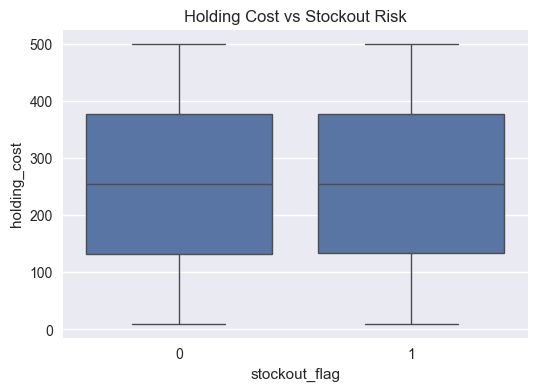

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=df,
    x='stockout_flag',
    y='holding_cost'
)
plt.title("Holding Cost vs Stockout Risk")
plt.show()


simple leakage insight

In [11]:
leakage_summary = df.groupby('stockout_flag').agg({
    'holding_cost': 'mean',
    'quantity_sold': 'mean',
    'inventory_level': 'mean'
}).reset_index()

leakage_summary


,stockout_flag,holding_cost,quantity_sold,inventory_level
0,0,254.473246,9.999064,309.208913
1,1,255.090594,9.996909,69.896422
